# Practica 09
## Jesús Emmanuel Arroyo Rangel
## Mtrícula: 220547
## 9-B
## IDGS
### Le gustan los tacos de pastor

## Dataset viejo

## IMPORTACION DE LIBRERIAS

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

## CARGAR EL DATASET

In [8]:
netflix_dataset=pd.read_csv("netflix_dataset.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# Contar valores únicos
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict, index=["unique count"]).transpose())

# Verificar valores faltantes en el dataset
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769
Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [11]:
#missing value
print('Table of missing value: ')
print(netflix_dataset.isnull().sum())

Table of missing value: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


## Analisis de datos exploratorio

Text(0.5, 1.0, 'TV Shows VS Movies')

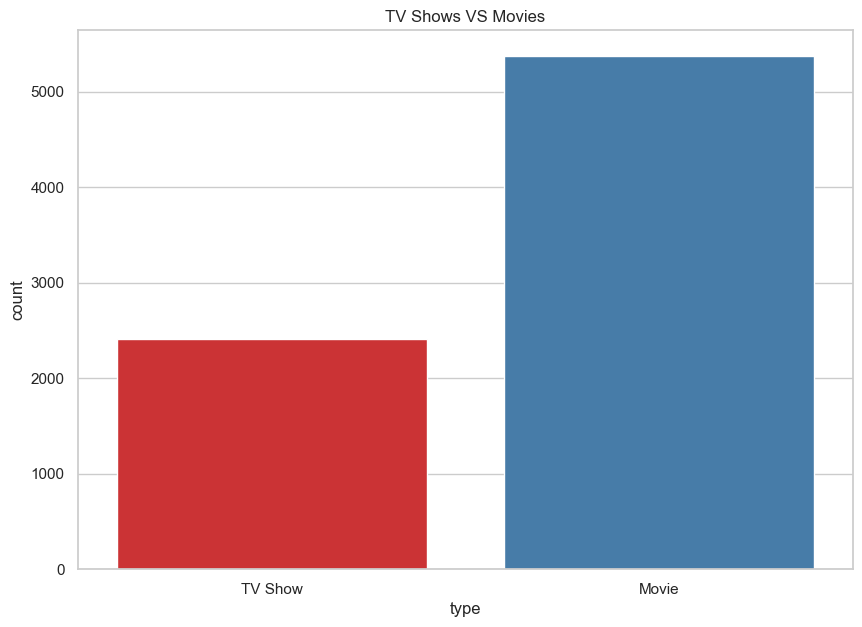

In [12]:
#Filtrar programas y peliculas
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

plt.figure(figsize=(10,7))#Define tamaño de la figura
sns.set(style="whitegrid")#Estilo grafico
ax = sns.countplot(x="type", data=netflix_dataset, palette="Set1")#Conteo de tipos
ax.set_title("TV Shows VS Movies")#titulo del grafico

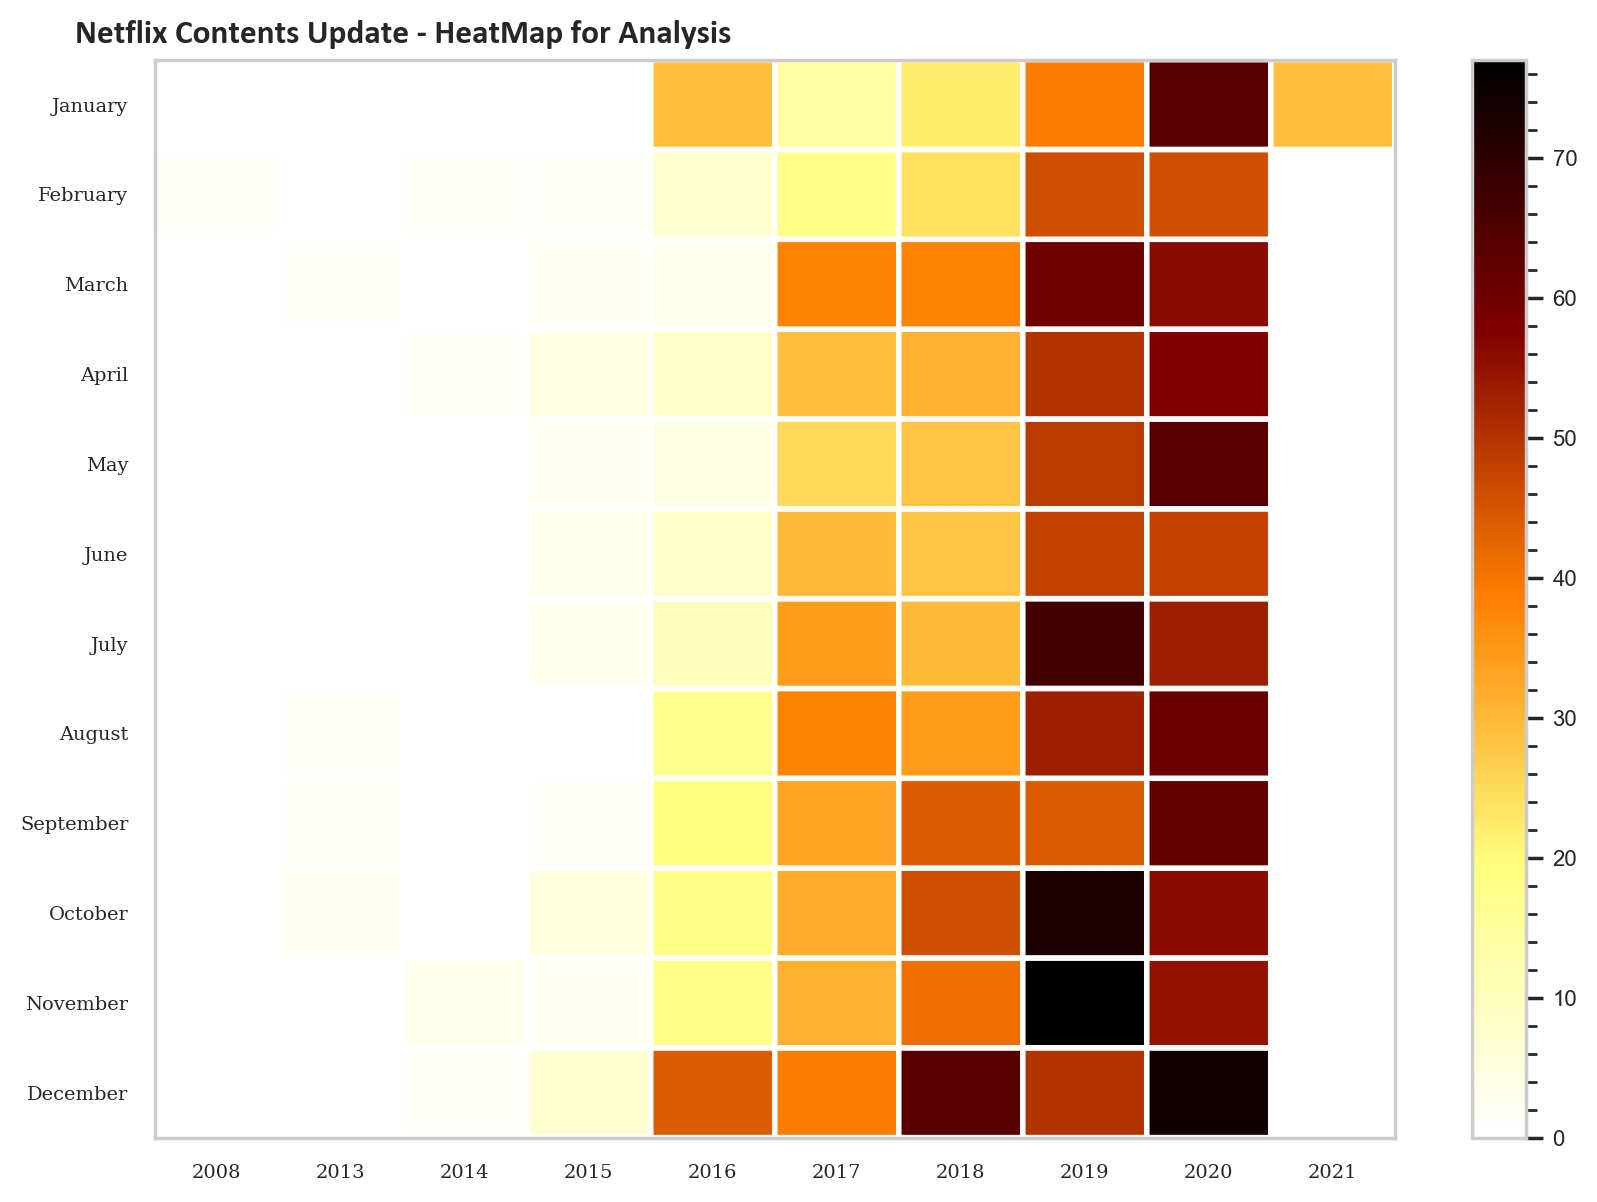

In [13]:
#¿En qué mes un productor puede publicar su contenido? 
#Mes con menor contenido añadido

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## Analisis de clasificaciones de peliculas

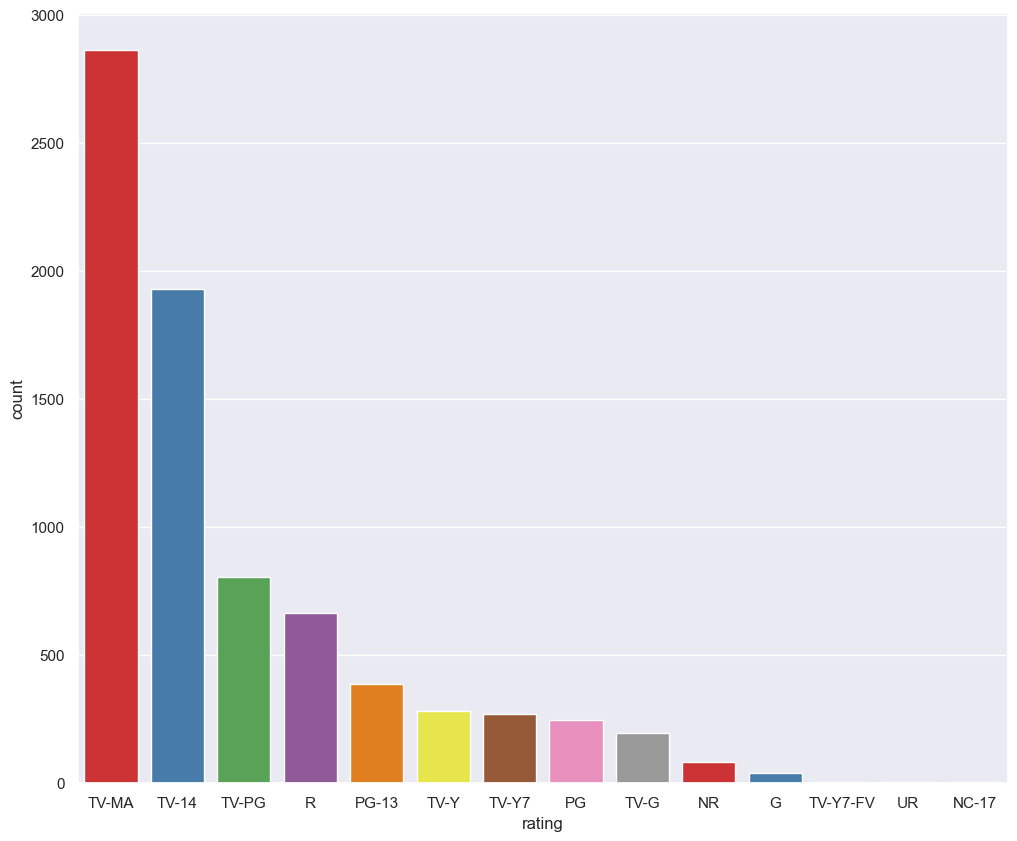

In [12]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])

## Análisis de las calificaciones de IMDB para obtener las películas mejor valoradas en Netflix

In [35]:
# Cargar datos de IMDB
imdb_ratings = pd.read_csv('IMDb ratings.csv', 
                          usecols=['weighted_average_vote', 'imdb_title_id']) 
imdb_titles = pd.read_csv('IMDb movies.csv', 
                         usecols=['title', 'year', 'genre', 'imdb_title_id']) 

#Datasets de IMDB usando el ID como clave
imdb_merged = pd.merge(imdb_titles, imdb_ratings, on='imdb_title_id', how='inner')

# Crear DataFrame limpio y sin duplicados
ratings = imdb_merged[['title', 'year', 'genre', 'weighted_average_vote']].copy()
ratings.columns = ['Title', 'Release Year', 'Genre', 'Rating']  # Renombrar columnas

# Eliminar duplicados (considerando mismo título, año y rating)
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)

# Limpiar valores nulos
ratings.dropna(inplace=True)

# Verificación
print(f"Dataset shape: {ratings.shape}")
print("\nPrimeras filas del dataset:")
print(ratings.head())

# Si quieres guardar este nuevo dataset
ratings.to_csv('imdb_title_ratings.csv', index=False)

# --- ANÁLISIS CON NETFLIX ---#
try:
    netflix_dataset = pd.read_csv('netflix_titles.csv')  # Ajusta el nombre según tu archivo
    
    joint_data = ratings.merge(netflix_dataset, left_on='Title', right_on='title', how='inner')
    joint_data = joint_data.sort_values(by='Rating', ascending=False)
    
    # Visualizar top 10
    top_rated = joint_data.head(10)
    fig = px.sunburst(
        top_rated,
        path=['title', 'country'],
        values='Rating',
        color='Rating',
        title='Top 10 películas/series mejor valoradas en IMDB disponibles en Netflix'
    )
    fig.show()
    
    # Análisis de países
    country_count = joint_data['country'].value_counts().sort_values(ascending=False)
    top_countries = country_count.head(10)
    print("\nTop países creadores de contenido en Netflix según IMDB:")
    print(top_countries)
    
except FileNotFoundError:
    print("\nDataset de Netflix no encontrado. Se omitirá esa parte del análisis.")

Dataset shape: (85852, 4)

Primeras filas del dataset:
                         Title Release Year                      Genre  Rating
0                   Miss Jerry         1894                    Romance     5.9
1  The Story of the Kelly Gang         1906    Biography, Crime, Drama     6.1
2               Den sorte drøm         1911                      Drama     5.8
3                    Cleopatra         1912             Drama, History     5.2
4                    L'Inferno         1911  Adventure, Drama, Fantasy     7.0

Dataset de Netflix no encontrado. Se omitirá esa parte del análisis.


## Las 10 películas mejor valoradas en Netflix

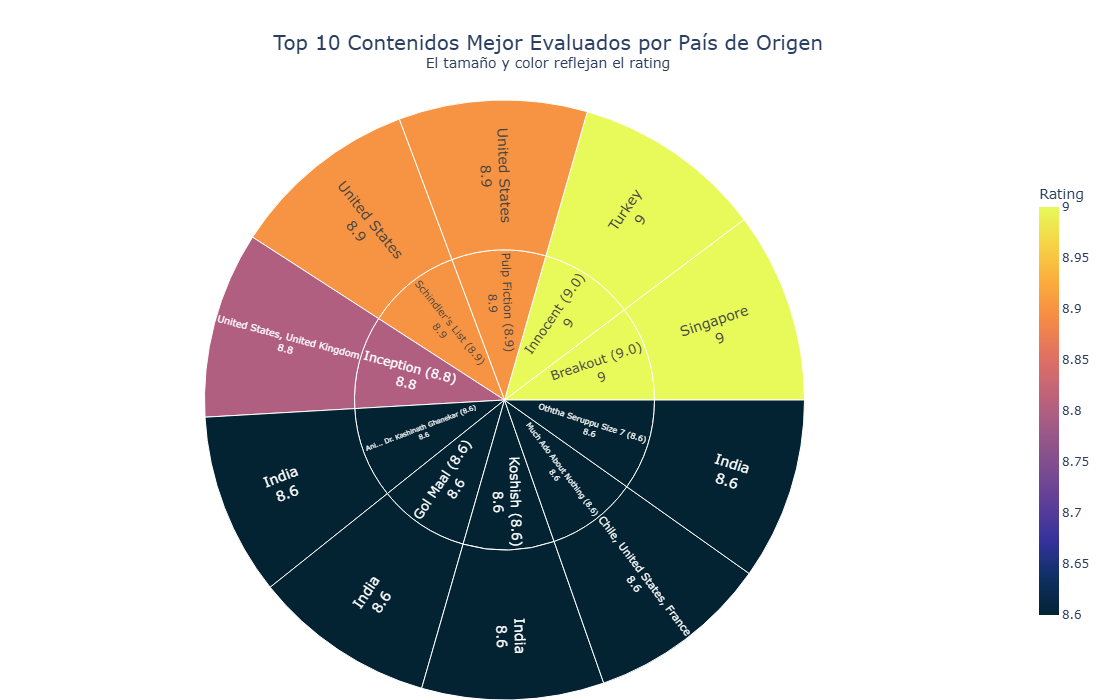

In [40]:
import plotly.express as px

# Verificar si tenemos datos de países
if 'joint_data' in locals():
    # Ordenar y seleccionar top 10
    top_rated = joint_data.sort_values(by='Rating', ascending=False).head(10).copy()
    
    # Crear etiquetas personalizadas que incluyan el rating
    top_rated['Label'] = top_rated['Title'] + ' (' + top_rated['Rating'].round(1).astype(str) + ')'
    
    # Crear el sunburst con mayor integración del rating
    fig = px.sunburst(
        top_rated,
        path=['Label', 'country'],  # Usamos las etiquetas personalizadas
        values='Rating',
        color='Rating',
        color_continuous_scale='thermal',  # Escala de colores más vibrante
        title='Top 10 Contenidos Mejor Evaluados por País de Origen<br><sup>El tamaño y color reflejan el rating</sup>',
        height=700,
        width=800
    )
    
    # Personalización avanzada
    fig.update_traces(
        textinfo="label+value",  # Muestra tanto la etiqueta como el valor
        insidetextorientation='radial',  # Mejor disposición del texto
        textfont_size=14,
        hovertemplate="<b>%{label}</b><br>Rating: %{value}<extra></extra>"
    )
    
    # Asegurarse de que no hay una variable llamada 'dict' que cause conflicto
    if 'dict' in globals():
        del dict  # Eliminar la variable conflictiva si existe
    
    fig.update_layout(
        margin=dict(t=100, l=0, r=0, b=0),  # Aquí dict es el tipo de dato
        title_x=0.5,
        title_font_size=20,
        coloraxis_colorbar=dict(
            title='Rating',
            thickness=20,
            len=0.75
        )
    )
    
    fig.show()
else:
    # Alternativa usando solo ratings (sin países)
    top_rated = ratings.sort_values(by='Rating', ascending=False).head(10).copy()
    top_rated['Label'] = top_rated['Title'] + ' (' + top_rated['Rating'].round(1).astype(str) + ')'
    
    fig = px.sunburst(
        top_rated,
        path=['Label', 'Genre'],
        values='Rating',
        color='Rating',
        title='Top 10 Contenidos Mejor Evaluados por Género'
    )
    fig.show()

## Principales países que crean contenidos

In [17]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


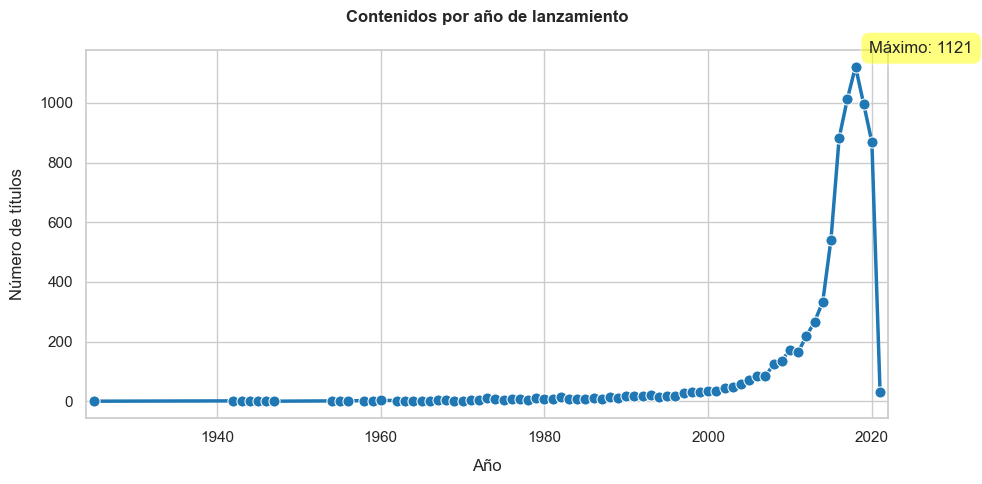

In [44]:
# Configuración inicial
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Datos básicos
conteo_anual = netflix_dataset['release_year'].value_counts().sort_index()

# Gráfico de línea
ax = sns.lineplot(
    x=conteo_anual.index,
    y=conteo_anual.values,
    color='#1f77b4',  # Azul estándar
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Personalización
plt.title('Contenidos por año de lanzamiento', pad=20, fontweight='bold')
plt.xlabel('Año', labelpad=10)
plt.ylabel('Número de títulos', labelpad=10)

# Ajustar ejes
ax.set_xlim(conteo_anual.index.min()-1, conteo_anual.index.max()+1)

# Punto máximo
max_point = conteo_anual.idxmax()
ax.annotate(f'Máximo: {conteo_anual.max()}',
            xy=(max_point, conteo_anual.max()),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

## Analísis de películas realizadas (países y tiempo de duración)

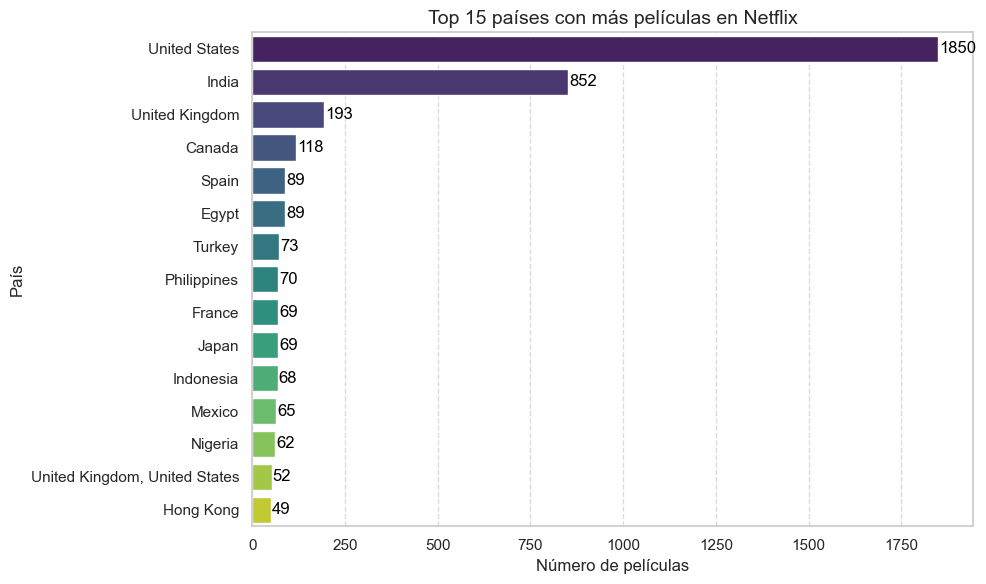

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo películas
peliculas = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Conteo por país (top 15)
paises_count = peliculas['country'].value_counts().head(15)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    y=paises_count.index,
    x=paises_count.values,
    palette='viridis',
    orient='h'
)

plt.title('Top 15 países con más películas en Netflix', fontsize=14)
plt.xlabel('Número de películas')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for i, v in enumerate(paises_count.values):
    plt.text(v + 3, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

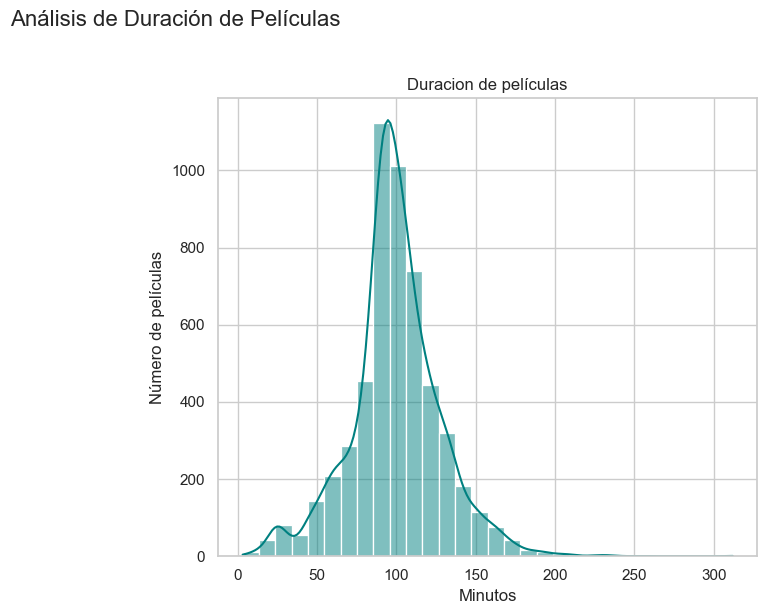

In [50]:
# Convertir duración a numérico
peliculas['duration_num'] = peliculas['duration'].str.extract('(\d+)').astype(float)

# Boxplot + Histograma combinado
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 2)
sns.histplot(
    peliculas['duration_num'],
    bins=30,
    kde=True,
    color='teal'
)
plt.title('Duracion de películas')
plt.xlabel('Minutos')
plt.ylabel('Número de películas')

plt.suptitle('Análisis de Duración de Películas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

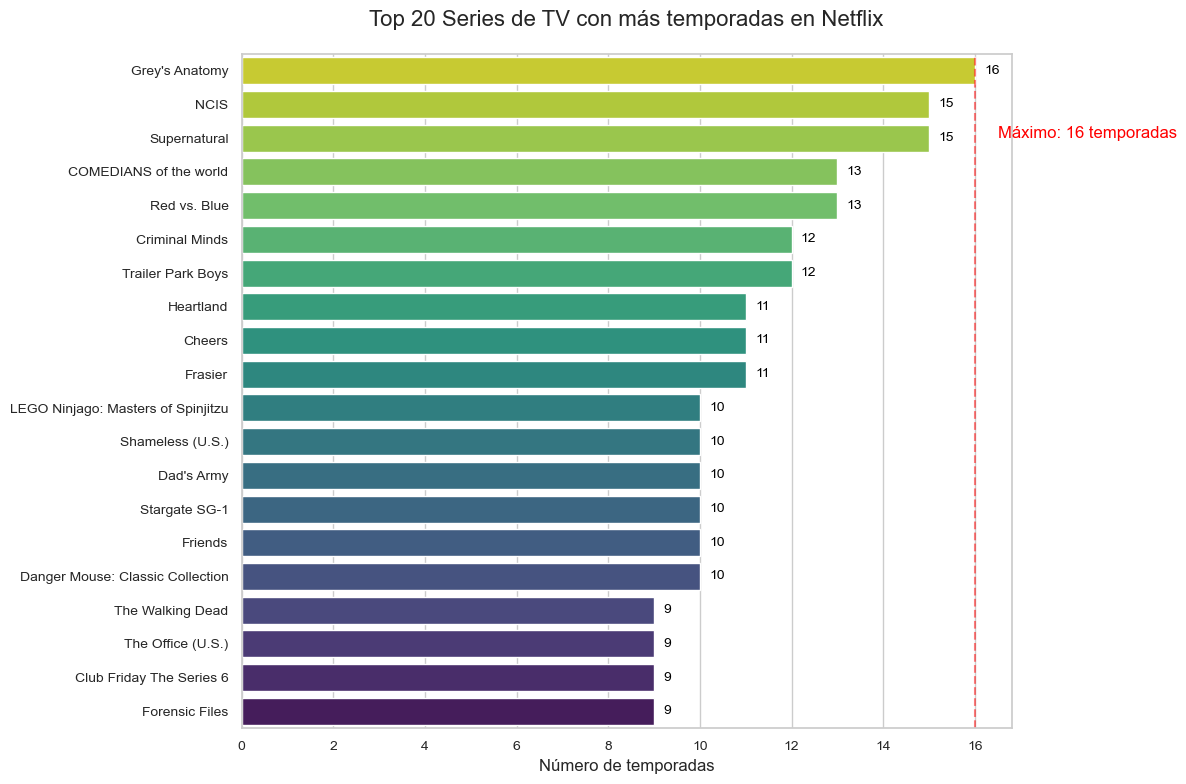

In [52]:
#Filtrar solo series de TV
series_tv = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()

#Extraer número de temporadas y limpiar datos
series_tv['num_seasons'] = series_tv['duration'].str.extract('(\d+)').astype(float)

#Ordenar y seleccionar top 20
top_series = series_tv.sort_values('num_seasons', ascending=False).head(20)

#Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='num_seasons',
    y='title',
    data=top_series,
    palette='viridis_r',
    orient='h'
)

#Gráfico
plt.title('Top 20 Series de TV con más temporadas en Netflix', fontsize=16, pad=20)
plt.xlabel('Número de temporadas', fontsize=12)
plt.ylabel('')  # Eliminamos etiqueta del eje Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Etiquetas de valor
for i, v in enumerate(top_series['num_seasons']):
    ax.text(v + 0.2, i, f'{int(v)}', color='black', va='center', fontsize=10)

max_seasons = top_series['num_seasons'].max()
plt.axvline(x=max_seasons, color='red', linestyle='--', alpha=0.5)
plt.text(max_seasons + 0.5, 2, f'Máximo: {int(max_seasons)} temporadas', color='red')

plt.tight_layout()
plt.show()

# DATASET ACTUAL (2025)

In [11]:
# Cargar los datasets
Netflix_dataset1 = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
Netflix_dataset2 = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")


# Concatenar verticalmente
Netflix_actual = pd.concat([Netflix_dataset1, Netflix_dataset2], ignore_index=True)

# Ver los primeros registros
print(Netflix_actual.head())

   show_id   type                                         title  \
0    10192  Movie                           Shrek Forever After   
1    27205  Movie                                     Inception   
2    12444  Movie  Harry Potter and the Deathly Hallows: Part 1   
3    38757  Movie                                       Tangled   
4    10191  Movie                      How to Train Your Dragon   

                      director  \
0                Mike Mitchell   
1            Christopher Nolan   
2                  David Yates   
3   Byron Howard, Nathan Greno   
4  Chris Sanders, Dean DeBlois   

                                                cast  \
0  Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...   
1  Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...   
2  Daniel Radcliffe, Emma Watson, Rupert Grint, T...   
3  Mandy Moore, Zachary Levi, Donna Murphy, Ron P...   
4  Jay Baruchel, Gerard Butler, Craig Ferguson, A...   

                                    country  date_added

In [4]:
Netflix_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39787 entries, 0 to 39786
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       39787 non-null  object 
 1   type          39787 non-null  object 
 2   title         39787 non-null  object 
 3   director      26301 non-null  object 
 4   cast          37708 non-null  object 
 5   country       37018 non-null  object 
 6   date_added    39777 non-null  object 
 7   release_year  39787 non-null  int64  
 8   rating        39780 non-null  object 
 9   duration      23787 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   36449 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  float64
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
 18  listed_in     7787 non-nul

In [5]:
# Contar valores únicos
dict = {}
for i in list(Netflix_actual.columns):
    dict[i] = Netflix_actual[i].value_counts().shape[0]
    
print(pd.DataFrame(dict, index=["unique count"]).transpose())

# Verificar valores faltantes en el dataset
print('Table of missing values: ')
print(Netflix_actual.isnull().sum())

              unique count
show_id              39381
type                     2
title                35803
director             15320
cast                 36939
country               2274
date_added            7069
release_year            77
rating                2742
duration               217
genres                3895
language                83
description          35990
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327
listed_in              492
Table of missing values: 
show_id             0
type                0
title               0
director        13486
cast             2079
country          2769
date_added         10
release_year        0
rating              7
duration        16000
genres           8868
language         7787
description      3338
popularity       7787
vote_count       7787
vote_average     7787
budget          23787
revenue         23787
listed_in       32000
dtype: int64


In [6]:
#missing value
print('Table of missing value: ')
print(Netflix_actual.isnull().sum())

Table of missing value: 
show_id             0
type                0
title               0
director        13486
cast             2079
country          2769
date_added         10
release_year        0
rating              7
duration        16000
genres           8868
language         7787
description      3338
popularity       7787
vote_count       7787
vote_average     7787
budget          23787
revenue         23787
listed_in       32000
dtype: int64


## Analisis de datos exploratorios (Dataset Actual)

Text(0.5, 1.0, 'TV Shows VS Movies')

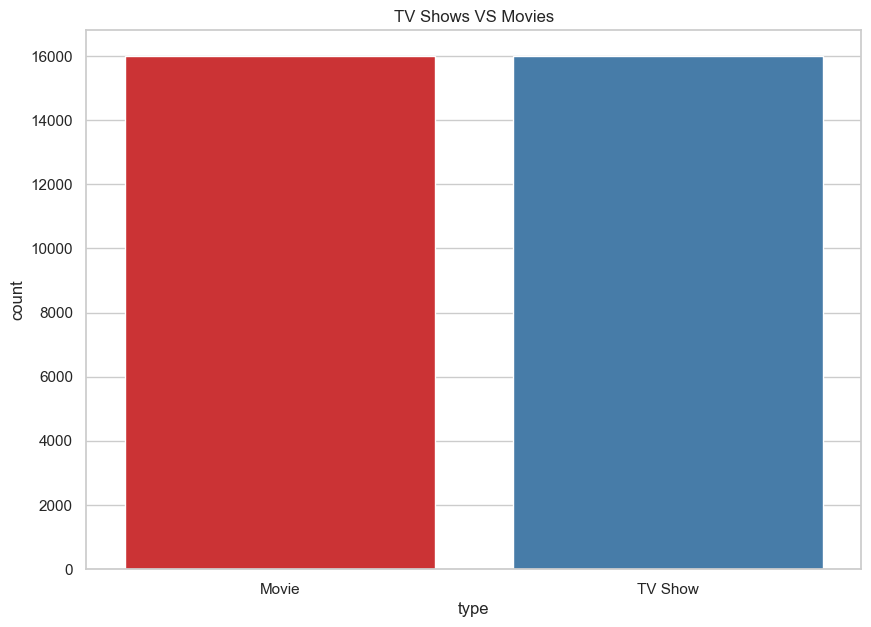

In [42]:
#Filtrar programas y peliculas
netflix_shows=Netflix_actual[Netflix_actual['type']=='TV Show']
netflix_movies=Netflix_actual[Netflix_actual['type']=='Movie']

plt.figure(figsize=(10,7))#Define tamaño de la figura
sns.set(style="whitegrid")#Estilo grafico
ax = sns.countplot(x="type", data=Netflix_actual, palette="Set1")#Conteo de tipos
ax.set_title("TV Shows VS Movies")#titulo del grafico

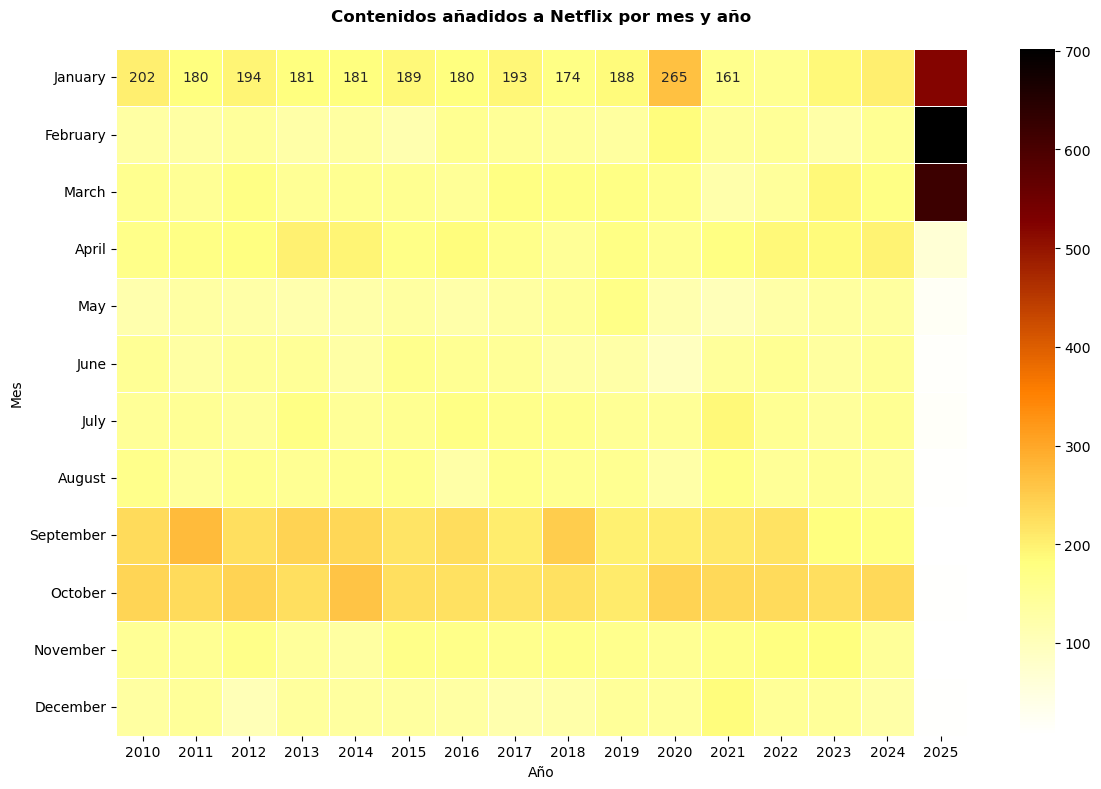

In [12]:
# Limpiar y convertir fechas
netflix_date = Netflix_actual[['date_added']].dropna()
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'])  # Convertir a datetime

# Extraer año y mes (nombres completos en inglés)
netflix_date['year'] = netflix_date['date_added'].dt.year.astype(str)
netflix_date['month'] = netflix_date['date_added'].dt.month_name()

# Crear tabla cruzada (conteos)
pivot_df = pd.crosstab(netflix_date['month'], netflix_date['year'])

# Ordenar meses correctamente
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
pivot_df = pivot_df.reindex(month_order)

# Heatmap con seaborn (mejor visualización)
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    cmap='afmhot_r',
    annot=True,          # Muestra valores en celdas
    fmt='g',             # Formato entero (evita notación científica)
    linewidths=0.5,
    linecolor='white'
)

# Ajustes estéticos
plt.title('Contenidos añadidos a Netflix por mes y año', pad=20, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.tight_layout()

plt.show()

In [33]:
print(netflix_date.head())

# Verifica el resultado del crosstab
print(pivot_df)

   date_added        year       month
0  2010-05-16  2010-05-16  2010-05-16
1  2010-07-15  2010-07-15  2010-07-15
2  2010-11-17  2010-11-17  2010-11-17
3  2010-11-24  2010-11-24  2010-11-24
4  2010-03-18  2010-03-18  2010-03-18
year       2010-01-01  2010-01-02  2010-01-03  2010-01-04  2010-01-05  \
month                                                                   
December          0.0         0.0         0.0         0.0         0.0   
November          0.0         0.0         0.0         0.0         0.0   
October           0.0         0.0         0.0         0.0         0.0   
September         0.0         0.0         0.0         0.0         0.0   
August            0.0         0.0         0.0         0.0         0.0   
July              0.0         0.0         0.0         0.0         0.0   
June              0.0         0.0         0.0         0.0         0.0   
May               0.0         0.0         0.0         0.0         0.0   
April             0.0         0.0         

## Analisis de clasificacion de películas

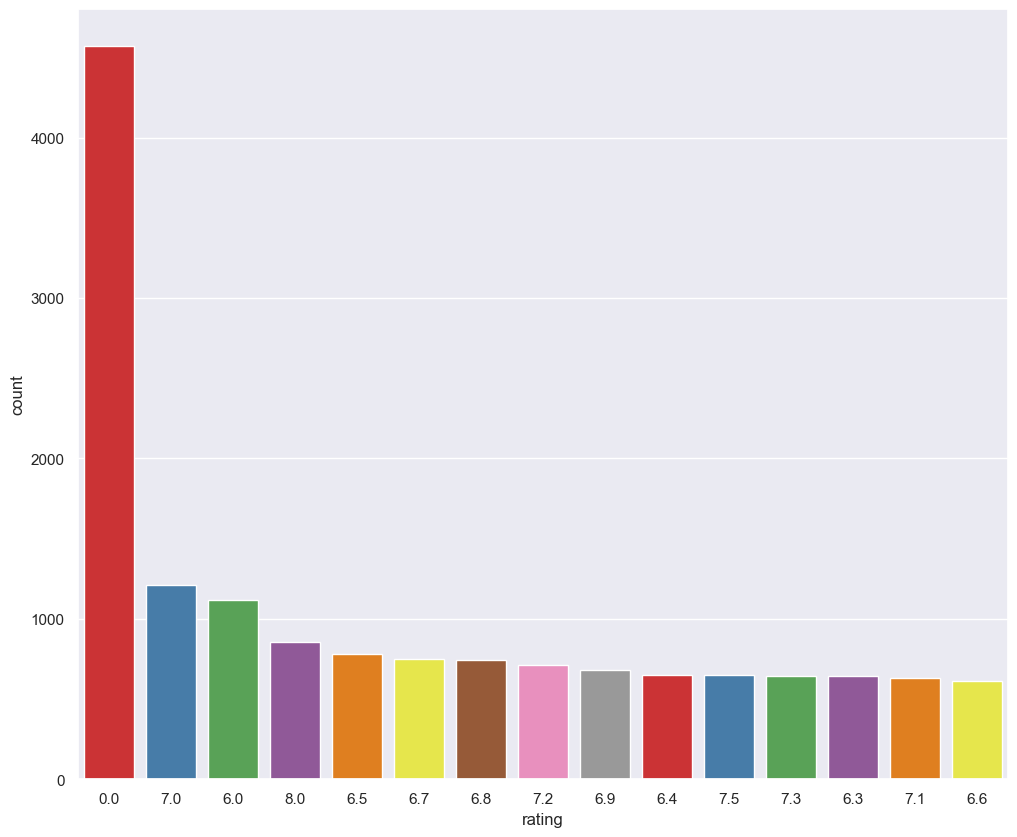

In [47]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=Netflix_actual, palette="Set1", order=Netflix_actual['rating'].value_counts().index[0:15])

## Análisis de las calificaciones de IMDB para obtener las películas mejor valoradas en Netflix

In [51]:
import pandas as pd

# 1. Cargar y limpiar datos de IMDb
imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote', 'imdb_title_id']) 
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title', 'year', 'genre', 'imdb_title_id'])

# Combinar IMDb
imdb_merged = pd.merge(imdb_titles, imdb_ratings, on='imdb_title_id', how='inner')
ratings = imdb_merged[['title', 'year', 'genre', 'weighted_average_vote']].copy()
ratings.columns = ['Title', 'Release Year', 'Genre', 'Rating']  # Renombrar columnas
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)
ratings.dropna(inplace=True)

# Limpiar Netflix_actual (asumiendo que ya está cargado)
netflix_clean = Netflix_actual[['title', 'type', 'release_year', 'country', 'rating']].copy()
netflix_clean.dropna(subset=['title', 'country'], inplace=True)
netflix_clean.drop_duplicates(subset=['title', 'release_year'], inplace=True)

# Combinar ambos datasets
joint_data = pd.merge(
    ratings,
    netflix_clean,
    left_on=['Title', 'Release Year'],
    right_on=['title', 'release_year'],
    how='inner'
)

# Mostrar primeras filas del dataset combinado
print("\n Primeras filas del dataset combinado (IMDb + Netflix):")
print(joint_data.head())

# Estadísticas básicas
print("\n Resumen estadístico:")
print(f"- Número de filas: {len(joint_data)}")
print(f"- Columnas disponibles: {joint_data.columns.tolist()}")
print("\nEjemplo de datos:")
print(joint_data[['Title', 'Release Year', 'type', 'country', 'Rating']].head(3))


 Primeras filas del dataset combinado (IMDb + Netflix):
             Title Release Year                      Genre  Rating  \
0  The Wicker Tree         2011              Drama, Horror     3.8   
1      On the Road         2012  Adventure, Drama, Romance     6.1   
2  The Evil Within         2017                     Horror     5.5   
3   Fahrenheit 451         2018    Drama, Sci-Fi, Thriller     4.9   
4   Jurassic World         2015  Action, Adventure, Sci-Fi     7.0   

             title   type  release_year  \
0  The Wicker Tree  Movie          2011   
1      On the Road  Movie          2012   
2  The Evil Within  Movie          2017   
3   Fahrenheit 451  Movie          2018   
4   Jurassic World  Movie          2015   

                                             country  rating  
0                                     United Kingdom   4.054  
1  Brazil, France, United Kingdom, United States ...   5.600  
2                           United States of America   5.800  
3          

## Las 10 mejores películas valoradas en Netflix

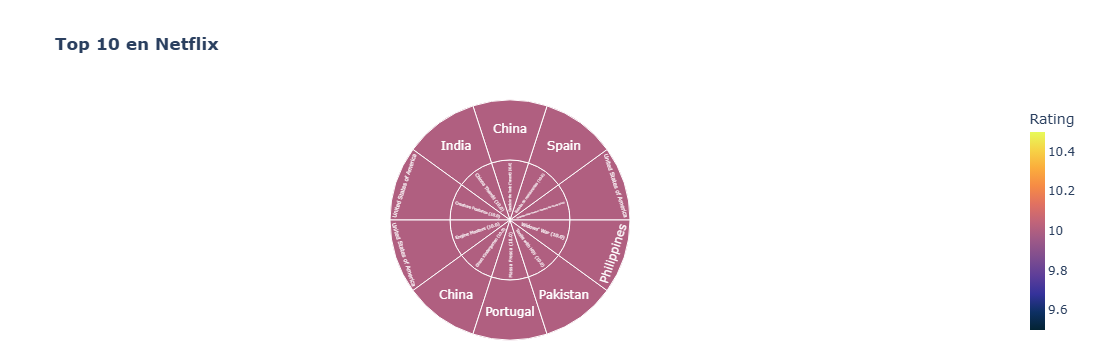

In [54]:
import pandas as pd
import plotly.express as px

# 1. Verificar si hay conflicto con el nombre 'dict'
if 'dict' in globals() and not callable(dict):
    print("¡Advertencia: La variable 'dict' está sobrescrita!")
    del dict  # Eliminamos la variable conflictiva

# 2. Cargar y preparar datos (Netflix_actual)
netflix_clean = Netflix_actual.dropna(subset=['title', 'rating', 'country']).copy()
netflix_clean = netflix_clean.drop_duplicates(subset=['title', 'release_year'])

# 3. Convertir rating a numérico (manejo de errores)
try:
    netflix_clean['rating'] = pd.to_numeric(netflix_clean['rating'])
except ValueError:
    # Si el rating es categórico (ej: "TV-MA"), asignamos valores dummy
    netflix_clean['rating'] = 1

# 4. Top 10 mejor calificados
top_10 = netflix_clean.sort_values('rating', ascending=False).head(10)
top_10['label'] = top_10['title'] + ' (' + top_10['rating'].round(1).astype(str) + ')'

# 5. Crear gráfico (con sintaxis alternativa para evitar conflictos)
fig = px.sunburst(
    top_10,
    path=['label', 'country'],
    values='rating',
    color='rating',
    color_continuous_scale='thermal'
)

# 6. Actualizar diseño (usando {} en lugar de dict())
fig.update_layout({
    'margin': {'t': 100, 'l': 20, 'r': 20, 'b': 20},
    'title_x': 0.5,
    'title': '<b>Top 10 en Netflix</b>',
    'coloraxis_colorbar': {
        'title': 'Rating',
        'thickness': 15
    }
})

fig.show()

## Principales países que crean contenido

In [61]:
import pandas as pd

# Calcular el conteo de países y seleccionar los 10 principales
top_countries = (
    joint_data['country'].value_counts()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Renombrar las columnas
top_countries.columns = ['País', 'Número de Contenidos']

# Formatear la tabla para mejor visualización
top_countries_styled = (
    top_countries.style
    .set_caption('Top 10 Países Productores de Contenido en Netflix')
    .format({'Número de Contenidos': '{:,}'})  # Formato con separadores de miles
    .background_gradient(cmap='Blues', subset=['Número de Contenidos'])
    .set_properties(**{'text-align': 'center'})
)

# Mostrar la tabla
display(top_countries_styled)

,País,Número de Contenidos
0,United States of America,617
1,United Kingdom,86
2,India,78
3,"United Kingdom, United States of America",36
4,France,33
5,Canada,30
6,Japan,25
7,Australia,22
8,"Canada, United States of America",19
9,South Korea,17


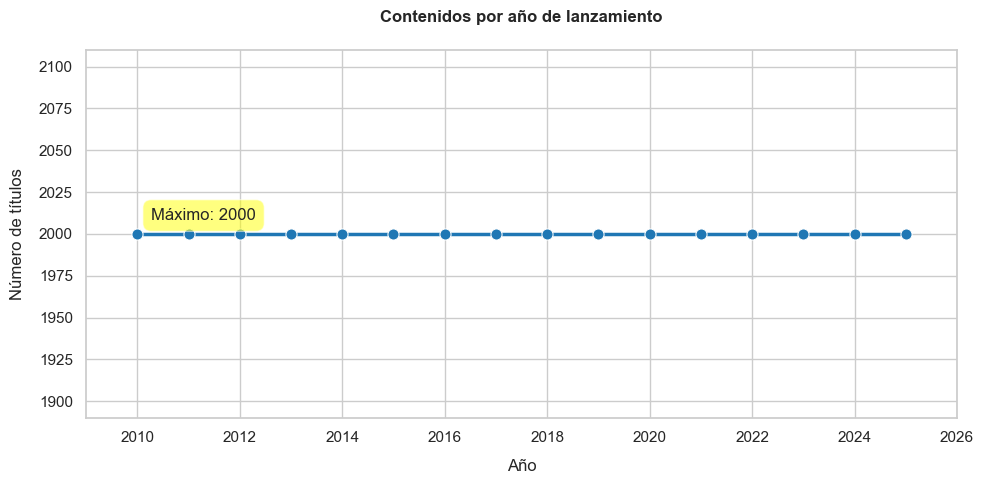

In [69]:
# Configuración inicial
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Datos básicos
conteo_anual = Netflix_actual['release_year'].value_counts().sort_index()

# Gráfico de línea
ax = sns.lineplot(
    x=conteo_anual.index,
    y=conteo_anual.values,
    color='#1f77b4',  # Azul estándar
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Personalización
plt.title('Contenidos por año de lanzamiento', pad=20, fontweight='bold')
plt.xlabel('Año', labelpad=10)
plt.ylabel('Número de títulos', labelpad=10)

# Ajustar ejes
ax.set_xlim(conteo_anual.index.min()-1, conteo_anual.index.max()+1)

# Punto máximo
max_point = conteo_anual.idxmax()
ax.annotate(f'Máximo: {conteo_anual.max()}',
            xy=(max_point, conteo_anual.max()),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

## Analísis de películas reaizadas (países y tiempo de duración)

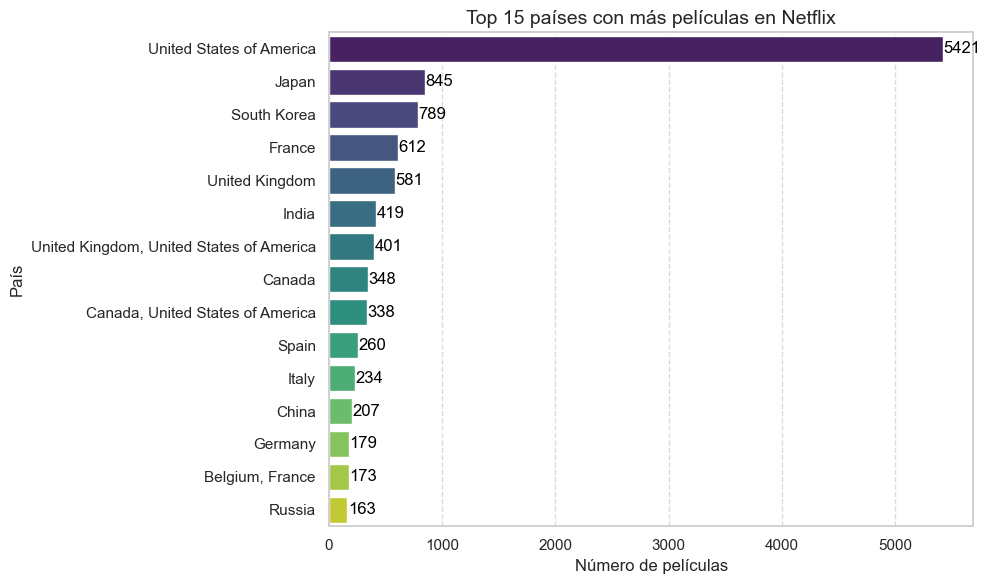

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo películas
peliculas = Netflix_actual[Netflix_actual['type'] == 'Movie']

# Conteo por país (top 15)
paises_count = peliculas['country'].value_counts().head(15)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    y=paises_count.index,
    x=paises_count.values,
    palette='viridis',
    orient='h'
)

plt.title('Top 15 países con más películas en Netflix', fontsize=14)
plt.xlabel('Número de películas')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for i, v in enumerate(paises_count.values):
    plt.text(v + 3, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


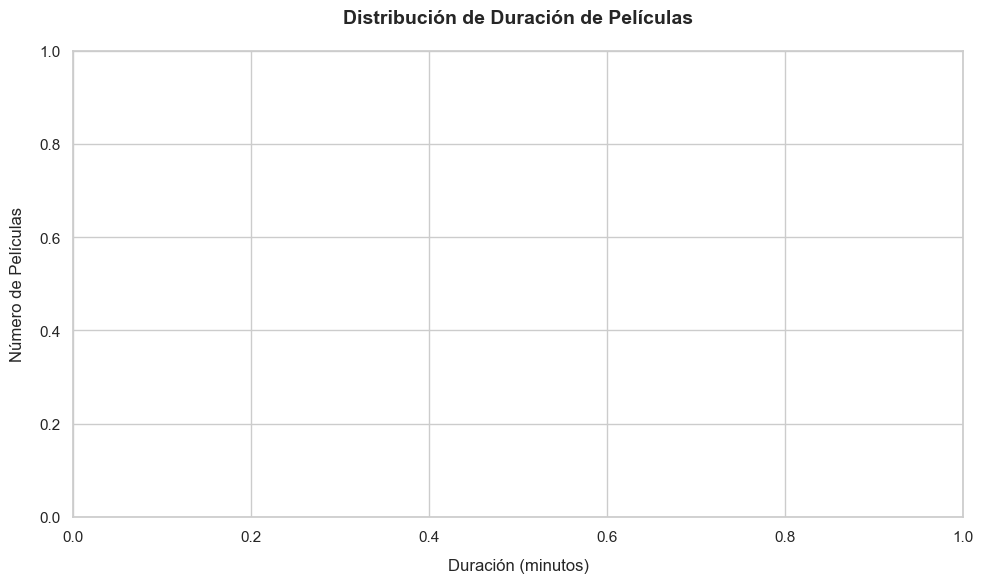

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Preparar los datos
peliculas = Netflix_actual[Netflix_actual['type'] == 'Movie'].copy()
peliculas['duracion'] = peliculas['duration'].str.extract('(\d+)').astype(float)

# 2. Configurar el estilo
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'

# 3. Crear histograma
sns.histplot(
    data=peliculas,
    x='duracion',
    bins=30,
    color='#E50914',  # Rojo Netflix
    kde=True,         # Curva de densidad
    edgecolor='white',
    linewidth=0.5
)

# 4. Personalizar el gráfico
plt.title('Distribución de Duración de Películas', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Duración (minutos)', fontsize=12, labelpad=10)
plt.ylabel('Número de Películas', fontsize=12, labelpad=10)

# 5. Mostrar estadísticas clave en el gráfico
if not peliculas.empty:
    mediana = peliculas['duracion'].median()
    plt.axvline(mediana, color='black', linestyle='--', linewidth=1.5)
    plt.text(mediana+5, plt.ylim()[1]*0.9, f'Mediana: {mediana:.0f} min', 
             fontsize=11, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Como podemos observar no se muestra nada en la gráfica ¿Por qué? la respuesta es simple, al revisar el dataset, no encontramos datos en la columna "durastion"
# Por ello no tendremos datos en nuestra gráfica

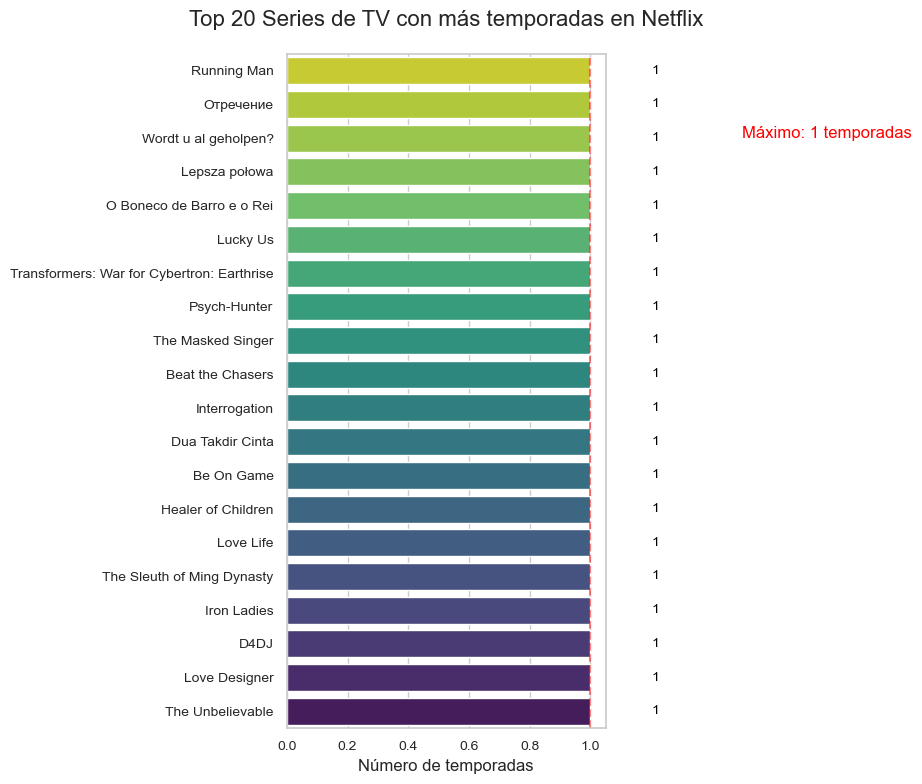

In [89]:
#Filtrar solo series de TV
series_tv = Netflix_actual[Netflix_actual['type'] == 'TV Show'].copy()

#Extraer número de temporadas y limpiar datos
series_tv['num_seasons'] = series_tv['duration'].str.extract('(\d+)').astype(float)

#Ordenar y seleccionar top 20
top_series = series_tv.sort_values('num_seasons', ascending=False).head(20)

#Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='num_seasons',
    y='title',
    data=top_series,
    palette='viridis_r',
    orient='h'
)

#Gráfico
plt.title('Top 20 Series de TV con más temporadas en Netflix', fontsize=16, pad=20)
plt.xlabel('Número de temporadas', fontsize=12)
plt.ylabel('')  # Eliminamos etiqueta del eje Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Etiquetas de valor
for i, v in enumerate(top_series['num_seasons']):
    ax.text(v + 0.2, i, f'{int(v)}', color='black', va='center', fontsize=10)

max_seasons = top_series['num_seasons'].max()
plt.axvline(x=max_seasons, color='red', linestyle='--', alpha=0.5)
plt.text(max_seasons + 0.5, 2, f'Máximo: {int(max_seasons)} temporadas', color='red')

plt.tight_layout()
plt.show()

# Sistema de recomendación (Basado en Contenido)

In [21]:
# Librerías fundamentales
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords # La lista completa de stopwords para inglés incluye 179 palabras

# Descargar stopwords si es que no se tienen
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Limpieza de descripciones NaN

In [14]:
def limpiar_netflix(df, min_palabras=3, min_caracteres=3):
    
    patron = re.compile(fr'(\b\w{{{min_caracteres},}}\b\s*){{{min_palabras},}}')
    df['description'] = df['description'].apply(
        lambda x: x if pd.notna(x) and bool(patron.search(str(x))) else np.nan
    )
    return df

# Uso directo:
Netflix_actual = limpiar_netflix(Netflix_actual)

# Opcional: Verificación rápida
print(f"Descripciones válidas: {Netflix_actual['description'].notna().sum()}/{len(Netflix_actual)}")

Descripciones válidas: 28579/32000


### Matriz de frecuencias sobre el vector de palabras utilizadas en la descripción

In [29]:
def analisis_frecuencias(df):
    # Construir matriz
    matriz, palabras = construir_matriz_frecuencias(df)
    
    # Frecuencias globales
    frecuencias = matriz.sum(axis=0).sort_values(ascending=False)
    
    # Estadísticas
    stats = {
        'top_palabras': frecuencias.head(20),
        'palabras_unicas': len(palabras),
        'documentos_promedio': int(matriz.sum().sum() / len(df))
    }
    
    return matriz, stats

matriz, stats = analisis_frecuencias(Netflix_actual)

print("\nAnálisis de frecuencias:")
print(f"Palabras únicas: {stats['palabras_unicas']}")
print(f"Palabras/documento: {stats['documentos_promedio']}")
print("\nTop 10 palabras:")
print(stats['top_palabras'].head(10).to_markdown())


Análisis de frecuencias:
Palabras únicas: 1000
Palabras/documento: 11

Top 10 palabras:
|        |    0 |
|:-------|-----:|
| life   | 5630 |
| family | 4105 |
| world  | 3813 |
| new    | 3764 |
| love   | 3652 |
| young  | 3573 |
| series | 2651 |
| story  | 2647 |
| man    | 2508 |
| time   | 2380 |


### Dimensiones de la matriz

In [22]:
Netflix_actual['description'] = Netflix_actual['description'].fillna('')

#Configuración del vectorizador TF-IDF
tfidf = TfidfVectorizer(
    stop_words=stopwords.words('english'),  # Elimina palabras vacías
    lowercase=True,        # Convierte a minúsculas
    ngram_range=(1, 2),   # Considera unigramas y bigramas
    max_features=5000     # Máximo número de features
)

#Creación de la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(Netflix_actual['description'])
print(f"Dimensiones de la matriz TF-IDF: {tfidf_matrix.shape}")

Dimensiones de la matriz TF-IDF: (32000, 5000)


### Imprime el contenido de los primero  y ultimos 5 resgistris de la matriz de frecuencias (tfidf_matrix)

In [36]:
# Configurar DataFrame de ejemplo (usando tus datos reales)
textos = Netflix_actual['description'].fillna('')
titulos = Netflix_actual['title']

# Crear matriz TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=20)  # Limité a 20 palabras para mejor visualización
tfidf_matrix = tfidf.fit_transform(textos)

# Convertir a DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=titulos
)

# Función para mostrar tablas con palabras relevantes
def mostrar_tabla_tfidf(df, rango):
    tabla = df.iloc[rango].copy()
    # Formatear para mostrar solo valores > 0.1
    tabla = tabla.applymap(lambda x: f"{x:.3f}" if x > 0.1 else "")
    return tabla

# Mostrar tablas
print(" PRIMEROS 5 REGISTROS (Palabras con TF-IDF > 0.1)")
display(mostrar_tabla_tfidf(tfidf_df, range(5)))

print("\n ÚLTIMOS 5 REGISTROS (Palabras con TF-IDF > 0.1)")
display(mostrar_tabla_tfidf(tfidf_df, range(-5, 0)))

 PRIMEROS 5 REGISTROS (Palabras con TF-IDF > 0.1)


,day,family,father,friends,high,life,lives,love,man,new,old,school,series,story,time,woman,world,year,years,young
title,,,,,,,,,,,,,,,,,,,,
Shrek Forever After,,,,,,,,0.719,,,,,,,,,0.695,,,
Inception,,,,,,0.604,,,,,0.797,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,,,,,,,,,,,,,,,,,0.643,0.766,,
Tangled,,,,,,,,,,,,,,,,,,,,
How to Train Your Dragon,,,1.000,,,,,,,,,,,,,,,,,



 ÚLTIMOS 5 REGISTROS (Palabras con TF-IDF > 0.1)


,day,family,father,friends,high,life,lives,love,man,new,old,school,series,story,time,woman,world,year,years,young
title,,,,,,,,,,,,,,,,,,,,
Sammelanam,,,,0.406,,,,0.716,,,0.406,,0.396,,,,,,,
Anne Shirley,,,,,,,,,,,,,,,,1.000,,,,
Le onde del passato,,,,,,,,,,,,,,,,,,,,
AI히치하이커,,,,,,,,,,,,,,,,,,,,
Alex & Laura's Saturday Night Takeaway,,,,,,,,,,,,,,,,,,,,


### Matríz de similaridad

In [40]:
# Generar matriz TF-IDF (usando los datos de Netflix_actual)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(Netflix_actual['description'].fillna(''))

# Construir matriz de similitud (coseno)
sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convertir a DataFrame para mejor visualización
sim_df = pd.DataFrame(
    sim_matrix,
    index=Netflix_actual['title'],
    columns=Netflix_actual['title']
)

# Función para mostrar muestras de la matriz
def mostrar_muestra_matriz(matriz, titulos, n=3):
    """Muestra una muestra de la matriz de similitud"""
    muestra = matriz.iloc[:n, :n].copy()
    np.fill_diagonal(muestra.values, np.nan)  # Ocultar diagonal (autosimilitud=1)
    return muestra.style.background_gradient(cmap='YlOrRd', vmin=0, vmax=1)\
                      .format("{:.2f}")\
                      .set_caption(f"Matriz de Similitud (Primeros {n} elementos)")

# Mostrar resultados
print(" Dimensión de la matriz:", sim_matrix.shape)
print(" Valores mínimos/máximos:", sim_matrix.min(), sim_matrix.max())

 Dimensión de la matriz: (32000, 32000)
 Valores mínimos/máximos: 0.0 1.0000000000000009


### Mapeo inverso de los índices

In [18]:
# Resetear la definición de dict (por si acaso)
dict = __builtins__.dict

# Crear mapeo inverso seguro
indices_inversos = {idx: title for idx, title in enumerate(Netflix_actual['title'])}

# Función de búsqueda mejorada
def get_title(idx):
    return indices_inversos.get(idx, f"Índice {idx} no encontrado")

# Ejemplo de uso
print("🔍 Mapeo de los primeros 3 índices:")
for i in range(3):
    print(f"{i} → {get_title(i)}")

🔍 Mapeo de los primeros 3 índices:
0 → Shrek Forever After
1 → Inception
2 → Harry Potter and the Deathly Hallows: Part 1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Cargar datos (ejemplo)
# Asumimos que Netflix_actual tiene las columnas 'title' y 'description'
titles = Netflix_actual['title'].values
descriptions = Netflix_actual['description'].fillna('')

# 2. Crear matriz TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(descriptions)

# 3. Construir mapeo inverso (índice -> título)
indices = pd.Series(Netflix_actual.index, index=titles).drop_duplicates()

# Versión optimizada como diccionario
indices_inversos = pd.Series(titles, index=range(len(titles))).to_dict()

# 4. Función para verificar el mapeo
def get_title_from_index(index):
    """Devuelve el título correspondiente a un índice de la matriz"""
    return indices_inversos.get(index, 'Índice no encontrado')

# 5. Ejemplo de uso con la matriz de similitud
sim_matrix = cosine_similarity(tfidf_matrix)

# Mostrar estructura
print(f"🔢 Dimensión de la matriz: {sim_matrix.shape}")
print(f"📚 Total de títulos mapeados: {len(indices_inversos)}")

# Test: Verificar mapeo para los primeros 3 índices
print("\n🔍 Verificación del mapeo inverso:")
for i in range(3):
    print(f"Índice {i} → Título: {get_title_from_index(i)}")

# 6. Aplicación práctica en recomendaciones
def get_recommendations(title, sim_matrix=sim_matrix, k=5):
    """Obtiene recomendaciones usando el mapeo inverso"""
    idx = indices[title]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:k+1]  # Excluir el propio título
    movie_indices = [i[0] for i in sim_scores]
    return [(get_title_from_index(i), sim_matrix[idx][i]) for i in movie_indices]

# Ejemplo de recomendación
print("\n🎯 Recomendaciones para 'The Family Fang':")
for title, score in get_recommendations('The Family Fang'):
    print(f"- {title} (similitud: {score:.2f})")

In [23]:
###Cálculo de similitud
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Mapeo de índices a títulos
indices = pd.Series(Netflix_actual.index, index=Netflix_actual['title']).drop_duplicates()

#Función de recomendación
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    try:
        # Obtener índice del título
        idx = indices[title]
        
        # Obtener puntuaciones de similitud
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Ordenar por puntuación
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Obtener los top más similares (excluyendo el propio título)
        sim_scores = sim_scores[1:top_n+1]
        
        # Obtener índices y puntuaciones
        movie_indices = [i[0] for i in sim_scores]
        scores = [i[1] for i in sim_scores]
        
        # Devolver recomendaciones
        recommendations = Netflix_actual[['title', 'type', 'description']].iloc[movie_indices]
        recommendations['similarity_score'] = np.round(scores, 3)
        
        return recommendations
    
    except KeyError:
        return f"El título '{title}' no se encuentra en el dataset."

 # Ejemplo de uso
get_recommendations("AK vs AK")

"El título 'AK vs AK' no se encuentra en el dataset."

### Prueba de peliculas "Welcome","Avenger: Infiniti War","Dil Dhadakne Do"

In [100]:
get_recommendations("Welcome")

"El título 'Welcome' no se encuentra en el dataset."

In [28]:
get_recommendations("Avenger: Infiniti War")

"El título 'Avenger: Infiniti War' no se encuentra en el dataset."

In [102]:
get_recommendations("Dil Dhadakne Do")

,title,type,description,similarity_score
6458,The Family Fang,Movie,A brother and sister return to their family ho...,0.349
791,Weddings and Other Disasters,Movie,Romantically disillusioned woman finds herself...,0.325
24964,Frankenstein Family,TV Show,The series centers on a family where both pare...,0.311
14791,The Piano Lesson,Movie,A brother and sister's battle over a prized he...,0.311
15777,Bring Her Back,Movie,A brother and sister uncover a terrifying ritu...,0.277
1385,Another Happy Day,Movie,A wedding at her parents' Annapolis estate hur...,0.260
8672,What Keeps You Alive,Movie,"Majestic mountains, a still lake and venomous ...",0.254
8547,Malevolent,Movie,A brother-sister team who fake paranormal enco...,0.251
938,Rabies,Movie,A brother and sister who run away from home fi...,0.251
8746,There's No Place Like Home,Movie,An extended family reunites after a long time ...,0.248


### Películas

In [27]:
get_recommendations("Interestellar")

"El título 'Interestellar' no se encuentra en el dataset."

In [26]:
get_recommendations("Black Panter")

"El título 'Black Panter' no se encuentra en el dataset."

### Series

In [25]:
get_recommendations("Breaking Bad")

"El título 'Breaking Bad' no se encuentra en el dataset."

In [29]:
get_recommendations("Death  Note")

"El título 'Death  Note' no se encuentra en el dataset."